<div style="width: 100%; background-color: #222; text-align: center">
<br><br>


    
<h2 style="color: #ef7d22; font-weight: normal;">
    Tuning diabetes prediction model
</h2>

<br><br> 
</div>





In this project, we'll focused in two key concept: **Cross-validation** and **Tunning Hyper-parameters** to achieve the best accuracy of the model.

We will continue working with the [Diabetes dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes), which have 8 numeric features plus a 0-1 class label.

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0:No or 1:Yes) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



### Load the `diabetes_3.csv` file, and store it into `diabetes_df` DataFrame.

This file has already wrong observations removed, and it is balanced.

In [2]:
diabetes_df = pd.read_csv('diabetes_3.csv')
diabetes_df

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
0,2,120,76,37,105,39.7,0.215,29,0
1,10,75,82,0,0,33.3,0.263,38,0
2,5,44,62,0,0,25.0,0.587,36,0
3,2,105,75,0,0,23.3,0.560,53,0
4,0,102,64,46,78,40.6,0.496,21,0
...,...,...,...,...,...,...,...,...,...
493,1,128,88,39,110,36.5,1.057,37,1
494,0,123,72,0,0,36.3,0.258,52,1
495,6,190,92,0,0,35.5,0.278,66,1
496,9,170,74,31,0,44.0,0.403,43,1


### Show the shape of the resulting `diabetes_df`.

In [3]:
diabetes_df.shape

(498, 9)

### Show the distribution of the target variable `(label)`

In [4]:
diabetes_df['label'].value_counts()

label
0    249
1    249
Name: count, dtype: int64



### Data preparation

Before modeling prepare the data:

#### Create features $X$ and labels $y$

In [5]:
X = diabetes_df.drop('label', axis=1)
y = diabetes_df['label']

#### Stantardize the features

Use the `StandardScaler` to standardize the features (`X`) before moving to model creation.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)



### Model creation and cross-validation evaluation

Build a `get_kneighbors_score` function that receives:
- `X`: features
- `y`: label
- `k`: neighbors

This function should train a `KNeighborsClassifier` and returns the mean and standard deviation of the scores of a **4-fold Cross-validation**.


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


def get_kneighbors_score(X, y, k):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=4)
    return (scores.mean(), scores.std() * 2)

#### Test your function

Use the **whole data** to test your `get_kneighbors_score()` function.

Print scores obtained by using `5`, `10` and `15` neighbors (`k`).

In [8]:
print(f"Using 5 neighbors: {get_kneighbors_score(X, y, 5)}")
print(f"Using 10 neighbors: {get_kneighbors_score(X, y, 10)}")
print(f"Using 15 neighbors: {get_kneighbors_score(X, y, 15)}")

Using 5 neighbors: (0.7349838709677419, 0.053628108165698345)
Using 10 neighbors: (0.724983870967742, 0.0610429899178123)
Using 15 neighbors: (0.7410645161290322, 0.07849895112537211)


Let's try to get the best `k` value.



### Getting the best amount of neighbors

Train a KNN to test different values of `k`.

Keep using a `KNeighborsClassifier` estimator and a **4-fold Cross-validation**.

Test the following `k` values:

In [9]:
parameters = [1, 3, 5, 8, 10, 12, 15, 18, 20, 25, 30, 50,60,80,90,100]

def get_kneighbors_score(k):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=4)
    return scores.mean()


ACC_dev = []

for k in parameters:
    scores=get_kneighbors_score(k)
    ACC_dev.append(scores)
    
ACC_dev

[0.6969193548387096,
 0.7108548387096774,
 0.7349838709677419,
 0.7249354838709676,
 0.724983870967742,
 0.7491129032258064,
 0.7410645161290322,
 0.7390967741935484,
 0.7390806451612904,
 0.7450645161290322,
 0.7370806451612903,
 0.7410161290322581,
 0.741,
 0.7430806451612902,
 0.7350645161290322,
 0.7250645161290323]

#### Getting the validation curve

Plot the validation curve (testing accuracy versus k). Which is the best `k` parameter?

In [10]:
parameters

[1, 3, 5, 8, 10, 12, 15, 18, 20, 25, 30, 50, 60, 80, 90, 100]

In [11]:
ACC_dev

[0.6969193548387096,
 0.7108548387096774,
 0.7349838709677419,
 0.7249354838709676,
 0.724983870967742,
 0.7491129032258064,
 0.7410645161290322,
 0.7390967741935484,
 0.7390806451612904,
 0.7450645161290322,
 0.7370806451612903,
 0.7410161290322581,
 0.741,
 0.7430806451612902,
 0.7350645161290322,
 0.7250645161290323]

In [12]:
best_index = ACC_dev.index(max(ACC_dev))
best_index

5

In [13]:
best_parameter = parameters[best_index]
best_parameter

12

In [14]:
best_accuracy = ACC_dev[best_index]
best_accuracy

0.7491129032258064

Best parameters: 12, Accuracy: 0.7491129032258064


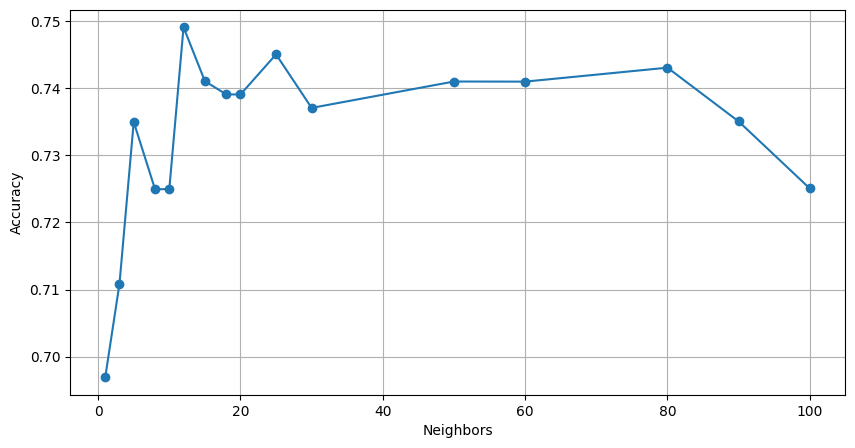

In [15]:
f, ax = plt.subplots(figsize=(10,5))

plt.plot(parameters, ACC_dev, 'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

plt.grid()
plt.plot()
print(f"Best parameters: {best_parameter}, Accuracy: {best_accuracy}")

**Results:**

After testing a range of k values for the K-Nearest Neighbors (KNN) classifier on the diabetes prediction dataset, the following key results were observed:

- The best performance was achieved with k = 12, where the model achieved an accuracy of 0.7491. This value was significantly higher than others in the range of tested k values.


- The validation curve (accuracy versus k values) was plotted, and it showed that as k increased from 1 to around 12, the accuracy steadily improved. However, beyond this point, the accuracy started to plateau, indicating that increasing k beyond a certain value did not result in further improvements.
